In [86]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [87]:
mnist = tf.keras.datasets.mnist # 28*28images of hand written digits from 0 t0 9
print(mnist)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

<module 'tensorflow._api.v1.keras.datasets.mnist' from 'C:\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\mnist\\__init__.py'>


In [88]:
# Normalise the dataset

x_train_N = tf.keras.utils.normalize(x_train, axis=1)
x_test_N =  tf.keras.utils.normalize(x_test, axis=1)
l_train=tf.keras.utils.to_categorical(y_train,10)
l_test=tf.keras.utils.to_categorical(y_test,10)

x_train_N=x_train_N.reshape(60000,784)
x_test_N=x_test_N.reshape(10000,784)
print(x_train_N.shape)

print(x_test_N.shape)
print(x_test_N.dtype)

(60000, 784)
(10000, 784)
float64


In [89]:
# Build the model 
# Feed forward netwrok(SEQUENTIAL)

from keras import models
from keras import layers
from keras.layers import Dropout


model = models.Sequential()


#First Hidden Layer 
model.add(layers.Dense(1024,activation='relu',kernel_initializer='he_normal',input_shape=(784,)))


# 2nd hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))



# 3rd hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))


# 4th hidden layer 
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))


#5th hidden layer
model.add(layers.Dense(1024, activation='relu',kernel_initializer='he_normal'))



# final layer, since it is multiclassification problem we are going to use softmax activation function which gives output as probablity distribution
model.add(layers.Dense(10, activation='softmax'))

# parameters for the training of the model
# neural netwrok tries to minimize the loss, loss is relationship to accuarcy 

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [90]:
model.fit(x_train_N,l_train,epochs=90,batch_size=256,validation_split = 0.2,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/90
 - 23s - loss: 0.2671 - acc: 0.9178 - val_loss: 0.1402 - val_acc: 0.9568
Epoch 2/90
 - 22s - loss: 0.0958 - acc: 0.9707 - val_loss: 0.1329 - val_acc: 0.9607
Epoch 3/90
 - 22s - loss: 0.0618 - acc: 0.9812 - val_loss: 0.0948 - val_acc: 0.9743
Epoch 4/90
 - 22s - loss: 0.0428 - acc: 0.9866 - val_loss: 0.1191 - val_acc: 0.9670
Epoch 5/90
 - 22s - loss: 0.0371 - acc: 0.9882 - val_loss: 0.1152 - val_acc: 0.9720
Epoch 6/90
 - 22s - loss: 0.0330 - acc: 0.9896 - val_loss: 0.1202 - val_acc: 0.9726
Epoch 7/90
 - 22s - loss: 0.0265 - acc: 0.9924 - val_loss: 0.1035 - val_acc: 0.9748
Epoch 8/90
 - 22s - loss: 0.0187 - acc: 0.9942 - val_loss: 0.1201 - val_acc: 0.9746
Epoch 9/90
 - 22s - loss: 0.0247 - acc: 0.9927 - val_loss: 0.1357 - val_acc: 0.9682
Epoch 10/90
 - 23s - loss: 0.0214 - acc: 0.9937 - val_loss: 0.1306 - val_acc: 0.9692
Epoch 11/90
 - 22s - loss: 0.0211 - acc: 0.9938 - val_loss: 0.1329 - val_acc: 0.9728
Epoch 12/90
 - 22s - los

In [91]:
# Calculated loss and accuracy on test data 

test_loss,test_acc=model.evaluate(x_test_N,l_test)
print("The loss on the test data: ")
print(test_loss)

print("Accuarcy of the model on the  test data:")
print(test_acc)


10000/10000 [==============================] - 6s 631us/step
The loss on the test data: 
0.19156952920535383
Accuarcy of the model on the  test data:
0.9821


In [83]:
# Find w and b of evry layer
layer_weights = model.get_weights()

B = layer_weights[1::2]
# We can also find weight and biases by following method
first_layer_weights=model.layers[0].get_weights()[0]
first_layer_biases=model.layers[0].get_weights()[1]
second_layer_weights=model.layers[1].get_weights()[0]
second_layer_biases=model.layers[1].get_weights()[1]
third_layer_weights=model.layers[2].get_weights()[0]
third_layer_biases=model.layers[2].get_weights()[1]
fourth_layer_weights=model.layers[3].get_weights()[0]
fourth_layer_biases=model.layers[3].get_weights()[1]
fifth_layer_weights=model.layers[4].get_weights()[0]
fifth_layer_biases=model.layers[4].get_weights()[1]
sixth_layer_weights=model.layers[5].get_weights()[0]
sixth_layer_biases=model.layers[5].get_weights()[1]



print(fifth_layer_weights.shape)
print(B)

(1024, 1024)
[array([ 0.0297671 , -0.06989929, -0.00261092, ..., -0.06184525,
       -0.02157955, -0.06911693], dtype=float32), array([ 0.03092804,  0.04490838, -0.07856093, ..., -0.13725804,
       -0.09014807, -0.08507124], dtype=float32), array([-0.12538783, -0.03990418, -0.16335529, ..., -0.1462563 ,
        0.19352268, -0.09538988], dtype=float32), array([ 0.036493  , -0.02243669,  0.05040984, ..., -0.05329393,
        0.15030588,  0.08801403], dtype=float32), array([ 0.00244802,  0.25374588, -0.00566718, ..., -0.04153974,
       -0.01120266,  0.01646812], dtype=float32), array([ 0.03701366, -0.15480103, -0.12137099, -0.02609856, -0.08618501,
       -0.11707236, -0.14775993, -0.12712507,  0.3624093 ,  0.0990948 ],
      dtype=float32)]


In [76]:
# Performing singular value decomposition
import numpy as np
from numpy import linalg as LA
u, S, v = LA.svd(first_layer_weights)

In [77]:
k = []
U=[]
s=[]
V=[]
for i in range(5):
    U.append([])
    s.append([])
    V.append([])

    
# Reference was taken from stack overflow
for i in range(5):
    U[i],s[i],V[i] = LA.svd(layer_weights[i*2])
    G = np.zeros((U[i].shape[0], V[i].shape[0]))
    G[:U[i].shape[0], :U[i].shape[0]] = np.diag(s[i])
    k.append((U[i]@G)@V[i])

In [78]:
# Approximation of new weight matrices
#Reference was taken from stackoverflow
W = []
for d in [10, 20, 50, 100, 200]:
    list = []
    for i in range(5):
        G = np.zeros((U[i].shape[0], V[i].shape[0]))
        G[:d, :d] = np.diag(s[i][:d])
        list.append((U[i]@G)@V[i])
    W.append(list)
W.append(k)

10000/10000 [==============================] - 3s 255us/step


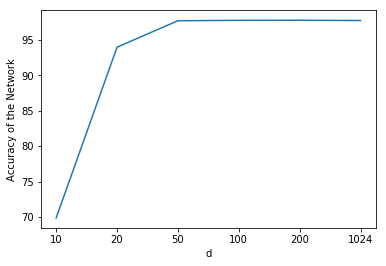

[69.87, 93.95, 97.68, 97.74000000000001, 97.75, 97.71]


In [79]:
# Plot of Accuracy vs d
# Reference was taken from matplotlib documentation

import matplotlib.pyplot as plt
acc_list = []
for i in range(len(W)):
    layer_weights[:10:2] = W[i]
    model.set_weights(layer_weights)
    acc_list.append(model.evaluate(x_test_N, l_test)[1]*100)

values=['10', '20', '50', '100', '200','1024']
plt.plot(values, acc_list) 
plt.xlabel('d')
plt.ylabel('Accuracy of the Network')
plt.show()
print(acc_list)

In [18]:
# Reference was taken from keras documentation  from https://keras.io/layers/writing-your-own-keras-layers/

from keras.models import Model
from keras import Input
from keras.initializers import Constant
from keras import backend as K
from keras.layers import Layer

class MyLayer(Layer):
    
    def __init__(self, output_dim, U, Vbar, bias, **kwargs):
        self.output_dim = output_dim
        self.U_mat = U
        self.Vbar_mat = Vbar
        self.b = bias
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.U = self.add_weight(name='U', 
                                      shape=self.U_mat.shape,
                                      initializer=Constant(self.U_mat),
                                      trainable=True)
        self.Vbar = self.add_weight(name='Vbar', 
                                      shape=self.Vbar_mat.shape,
                                      initializer=Constant(self.Vbar_mat),
                                      trainable=True)
        
        self.bias = self.add_weight(name = 'bias',
                                      shape = (self.output_dim,),
                                      initializer=Constant(self.b),
                                      trainable=True)
        
        super(MyLayer, self).build(input_shape)  

    def call(self, x):
        return K.relu(K.dot(x, K.dot(self.U, self.Vbar)) + self.bias)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [19]:

last_layer = model.get_layer(index=5)
sixth_layer_weights=model.layers[5].get_weights()[0]



In [20]:
# Singular Value Decompos on each weight matrix

k1 = []
u=[]
s=[]
v=[]
for i in range(5):
    u.append([])
    s.append([])
    v.append([])
for i in range(5):
    u[i],s[i],v[i] = LA.svd(layer_weights[i*2])
    g = np.zeros((u[i].shape[0], v[i].shape[0]))
    g[:20, :20] = np.diag(s[i][:20])
    k1.append((u[i], g@v[i]))

In [22]:
# New model
#Reference was taken from stack overflow and keras documentation 
input = Input(shape = (28*28,))
x = MyLayer(1024, U = k1[0][0], Vbar = k1[0][1], bias = B[0])(input)
x = MyLayer(1024, U = k1[1][0], Vbar = k1[1][1], bias = B[1])(x)
x = MyLayer(1024, U = k1[2][0], Vbar = k1[2][1], bias = B[2])(x)
x = MyLayer(1024, U = k1[3][0], Vbar = k1[3][1], bias = B[3])(x)
x = MyLayer(1024, U = k1[4][0], Vbar = k1[4][1], bias = B[4])(x)
output = last_layer(x)
new_model = Model(input, output)
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
new_model.fit(x_train_N,l_train,epochs=15,batch_size=1024,validation_split = 0.2,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 64s - loss: 1.4348 - acc: 0.4731 - val_loss: 0.4600 - val_acc: 0.8759
Epoch 2/15
 - 59s - loss: 0.3030 - acc: 0.9148 - val_loss: 0.2190 - val_acc: 0.9367
Epoch 3/15
 - 113s - loss: 0.1567 - acc: 0.9550 - val_loss: 0.1462 - val_acc: 0.9593
Epoch 4/15
 - 30s - loss: 0.1005 - acc: 0.9710 - val_loss: 0.1205 - val_acc: 0.9656
Epoch 5/15
 - 30s - loss: 0.0800 - acc: 0.9765 - val_loss: 0.1391 - val_acc: 0.9630
Epoch 6/15
 - 29s - loss: 0.0663 - acc: 0.9808 - val_loss: 0.1308 - val_acc: 0.9643
Epoch 7/15
 - 30s - loss: 0.0571 - acc: 0.9826 - val_loss: 0.1123 - val_acc: 0.9698
Epoch 8/15
 - 29s - loss: 0.0514 - acc: 0.9849 - val_loss: 0.1351 - val_acc: 0.9698
Epoch 9/15
 - 28s - loss: 0.0451 - acc: 0.9866 - val_loss: 0.1302 - val_acc: 0.9689
Epoch 10/15
 - 28s - loss: 0.0434 - acc: 0.9869 - val_loss: 0.1304 - val_acc: 0.9693
Epoch 11/15
 - 26s - loss: 0.0381 - acc: 0.9890 - val_loss: 0.1159 - val_acc: 0.9708
Epoch 12/15
 - 27s - lo

In [24]:
# Evaluating the model on test data
test_loss,test_acc=new_model.evaluate(x_test_N,l_test)
print("The loss on the test data: ")
print(test_loss)

print("Accuarcy of the new model on the  test data:")
print(test_acc)

10000/10000 [==============================] - 31s 3ms/step
The loss on the test data: 
0.11712642328971996
Accuarcy of the new model on the  test data:
0.9739


#Question Number 2

In [25]:
import numpy as np
import librosa
#Reference from stackoverflow 
#Input file
data_X=[]
for i in range(10):
    s, sr=librosa.load(r'timit-homework/tr/trx000' + str(i) + '.wav', sr=None)
    S=librosa.stft(s, n_fft=1024, hop_length=512)
    data_X.append(S)
    
#Signal file
signal_X=[]                      
for i in range(10):
    sn, sr=librosa.load(r'timit-homework/tr/trs000' + str(i) + '.wav', sr=None)
    X=librosa.stft(sn, n_fft=1024, hop_length=512)
    signal_X.append(X)
    
#noise file                       
noise_X=[]                      
for i in range(10):
    sm, sr=librosa.load(r'timit-homework/tr/trn000' + str(i) + '.wav', sr=None)
    Xm=librosa.stft(sm, n_fft=1024, hop_length=512)
    noise_X.append(Xm)
print(len(data_X))
print(len(noise_X))
print(len(signal_X))

10
10
10


In [26]:
  # Training data set 
for i in range(10, 100):
    s1, sr=librosa.load(r'timit-homework/tr/trx00' + str(i) + '.wav', sr=None)
    S1=librosa.stft(s1, n_fft=1024, hop_length=512)
    data_X.append(S1)
    
                    
for i in range(10,100):
    sn1, sr=librosa.load(r'timit-homework/tr/trs00' + str(i) + '.wav', sr=None)
    X1=librosa.stft(sn1, n_fft=1024, hop_length=512)
    signal_X.append(X1)
                     
for i in range(10,100):
    sm1, sr=librosa.load(r'timit-homework/tr/trn00' + str(i) + '.wav', sr=None)
    Xm1=librosa.stft(sm1, n_fft=1024, hop_length=512)
    noise_X.append(Xm1)
###
 
print(len(data_X))
print(len(noise_X))
print(len(signal_X))

for i in range(100, 1000):
    s2, sr=librosa.load(r'timit-homework/tr/trx0' + str(i) + '.wav', sr=None)
    S2=librosa.stft(s2, n_fft=1024, hop_length=512)
    data_X.append(S2)
    
    sn2, sr=librosa.load(r'timit-homework/tr/trs0' + str(i) + '.wav', sr=None)
    X2=librosa.stft(sn2, n_fft=1024, hop_length=512)
    signal_X.append(X2)
                     
    sm2, sr=librosa.load(r'timit-homework/tr/trn0' + str(i) + '.wav', sr=None)
    Xm2=librosa.stft(sm2, n_fft=1024, hop_length=512)
    noise_X.append(Xm2)

print(len(data_X))
print(len(noise_X))
print(len(signal_X))
 ###   
for i in range(1000, 1200):
    s3, sr=librosa.load(r'timit-homework/tr/trx' + str(i) + '.wav', sr=None)
    S3=librosa.stft(s3, n_fft=1024, hop_length=512)
    data_X.append(S3)
    
    sn3, sr=librosa.load(r'timit-homework/tr/trs' + str(i) + '.wav', sr=None)
    X3=librosa.stft(sn3, n_fft=1024, hop_length=512)
    signal_X.append(X3)
                     
    sm3, sr=librosa.load(r'timit-homework/tr/trn' + str(i) + '.wav', sr=None)
    Xm3=librosa.stft(sm3, n_fft=1024, hop_length=512)
    noise_X.append(Xm3)
print(len(data_X))
print(len(noise_X))
print(len(signal_X))   


100
100
100
1000
1000
1000
1200
1200
1200


In [30]:
#Training Data Set
mod_data_X = []
for i in data_X:
    mod_data_X.append(np.abs(i).transpose())
mod_Signal_X = []
for i in signal_X:
    mod_Signal_X.append(np.abs(i).transpose())
mod_noise_X = []
for i in noise_X:
    mod_noise_X.append(np.abs(i).transpose())


In [31]:
#Validation Data set


data_V=[]
signal_V=[]
noise_V=[]


for i in range(0,10):
    v1, sr=librosa.load('timit-homework/v/vx000' + str(i) + '.wav', sr=None) 
    V1=librosa.stft(v1, n_fft=1024, hop_length=512) 
    data_V.append(V1)  
    vs1, sr=librosa.load('timit-homework/v/vs000' + str(i) + '.wav', sr=None) 
    VS1=librosa.stft(vs1, n_fft=1024, hop_length=512)
    signal_V.append(VS1)    
    vn1, sr=librosa.load('timit-homework/v/vn000' + str(i) + '.wav', sr=None) 
    VN1=librosa.stft(vn1, n_fft=1024, hop_length=512) 
    noise_V.append(VN1)
for i in range(10, 100):
    
    
    v1, sr=librosa.load('timit-homework/v/vx00' + str(i) + '.wav', sr=None) 
    V1=librosa.stft(v1, n_fft=1024, hop_length=512) 
    data_V.append(V1)    
    vs1, sr=librosa.load('timit-homework/v/vs00' + str(i) + '.wav', sr=None) 
    VS1=librosa.stft(vs1, n_fft=1024, hop_length=512)
    signal_V.append(VS1)    
    vn1, sr=librosa.load('timit-homework/v/vn00' + str(i) + '.wav', sr=None) 
    VN1=librosa.stft(vn1, n_fft=1024, hop_length=512) 
    noise_V.append(VN1)    
for i in range(100, 1000):
    
    
    v1, sr=librosa.load('timit-homework/v/vx0' + str(i) + '.wav', sr=None) 
    V1=librosa.stft(v1, n_fft=1024, hop_length=512) 
    data_V.append(V1)    
    vs1, sr=librosa.load('timit-homework/v/vs0' + str(i) + '.wav', sr=None) 
    VS1=librosa.stft(vs1, n_fft=1024, hop_length=512)
    signal_V.append(VS1)    
    vn1, sr=librosa.load('timit-homework/v/vn0' + str(i) + '.wav', sr=None) 
    VN1=librosa.stft(vn1, n_fft=1024, hop_length=512) 
    noise_V.append(VN1)
for i in range(1000, 1200):
    
    v1, sr=librosa.load('timit-homework/v/vx' + str(i) + '.wav', sr=None) 
    V1=librosa.stft(v1, n_fft=1024, hop_length=512) 
    data_V.append(V1)   
    vs1, sr=librosa.load('timit-homework/v/vs' + str(i) + '.wav', sr=None) 
    VS1=librosa.stft(vs1, n_fft=1024, hop_length=512)
    signal_V.append(VS1)    
    vn1, sr=librosa.load('timit-homework/v/vn' + str(i) + '.wav', sr=None) 
    VN1=librosa.stft(vn1, n_fft=1024, hop_length=512) 
    noise_V.append(VN1)

In [32]:
#Finding the magnitude and taking transpose of the absolute validation dataset
V_data_mod = []
for i in data_V:
    V_data_mod.append(np.abs(i).transpose())
V_Signal_mod = []
for i in signal_V:
    V_Signal_mod.append(np.abs(i).transpose())
V_Noise_mod = []
for i in noise_V:
    V_Noise_mod.append(np.abs(i).transpose())


    

In [33]:
#Ideal Binary Mask on training data
IBM = []
for i in range(len(mod_data_X)):
    IBM.append(mod_Signal_X[i] - mod_noise_X[i])
    
for i in range(len(IBM)):
    IBM[i][IBM[i]>=0] = 1
    IBM[i][IBM[i]<0] = 0

In [35]:
#Ideal Binary Mask on validation data set
Valid_IBM = []
for i in range(len(V_data_mod)):
    Valid_IBM.append(V_Signal_mod[i] - V_Noise_mod[i])
    
for i in range(len(Valid_IBM)):
    Valid_IBM[i][Valid_IBM[i]>=0] = 1
    Valid_IBM[i][Valid_IBM[i]<0] = 0

In [36]:
#GRU Model
# Reference from stack overflow
from keras import models
from keras.layers import Dense, GRU, TimeDistributed, InputLayer, Layer
from keras.models import Sequential
model_g = Sequential()
model_g.add(InputLayer(input_shape= (None, 513)))
model_g.add(GRU(513, return_sequences = True, dropout = 0.1, recurrent_dropout = 0.3))
model_g.add(GRU(513, return_sequences = True, recurrent_dropout = 0.3))
model_g.add(TimeDistributed(Dense(513, activation = 'sigmoid')))

In [37]:
model_g.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [38]:
#Generating batches of 10 samples of data
def sample(mod_data_X, IBM):
    while True:
        for i in range(0, len(mod_data_X), 10):
            if i >= len(mod_data_X)-10:
                i = 0
            batch = np.stack(mod_data_X[i:i+10])
            label = np.stack(IBM[i:i+10])
            yield batch, label

In [39]:
type(mod_data_X)
type(IBM)

list

In [52]:
# Training model
model_g.fit_generator(sample(mod_data_X, IBM),steps_per_epoch = len(mod_data_X)/10, epochs = 40)

Epoch 1/40
120/120 [==============================] - 161s 1s/step - loss: 0.3417 - acc: 0.8479
Epoch 2/40
120/120 [==============================] - 162s 1s/step - loss: 0.3407 - acc: 0.8483
Epoch 3/40
120/120 [==============================] - 161s 1s/step - loss: 0.3404 - acc: 0.8485
Epoch 4/40
120/120 [==============================] - 163s 1s/step - loss: 0.3388 - acc: 0.8496
Epoch 5/40
120/120 [==============================] - 161s 1s/step - loss: 0.3367 - acc: 0.8503
Epoch 6/40
120/120 [==============================] - 161s 1s/step - loss: 0.3371 - acc: 0.8502
Epoch 7/40
120/120 [==============================] - 162s 1s/step - loss: 0.3373 - acc: 0.8501
Epoch 8/40
120/120 [==============================] - 6165s 51s/step - loss: 0.3364 - acc: 0.8504
Epoch 9/40
120/120 [==============================] - 163s 1s/step - loss: 0.3361 - acc: 0.8506
Epoch 10/40
120/120 [==============================] - 162s 1s/step - loss: 0.3349 - acc: 0.8511
Epoch 11/40
120/120 [================

In [53]:
valid = []
for i in range(0, len(V_data_mod), 10):
    pred_valid = model_g.predict(np.stack(V_data_mod[i:i+10]))
    # Denoising validation files using Ideal Binary Mask predictd by the model
    for j in range(10):
        
        trans_v=pred_valid[j].transpose()
        Mul=np.multiply(trans_v,data_V[i:i+10][j])

        valid.extend([Mul])

In [54]:
Pred_Valid_Signal=[]
for i in valid:
    Pred_Valid_Signal.append(librosa.istft(i, hop_length=512))

In [55]:
#Calculation of SNR on validation data set
SNR = []
for i in range(len(valid)):
    SNR.append(10*np.log10(np.add.reduce(np.abs(signal_V[i])**2, axis = None)/np.add.reduce((np.abs(signal_V[i])-np.abs(valid[i]))**2, axis =None)))

print('The Signal to Noise ratio on Validation data set is:', np.mean(SNR))

The Signal to Noise ratio on Validation data set is: 12.940772611896197


In [ ]:
#Validation model
#model_g.fit_generator(sample(mod_data_V,IBM_V),steps_per_epoch=len(mod_data_V)/10,epochs=40)

In [56]:
## Loading Test Data File

import numpy as np
import librosa
#Reference from stackoverflow 
#Input file
data_test=[]
for i in range(10):
    s, sr=librosa.load(r'timit-homework/te/tex000' + str(i) + '.wav', sr=None)
    S=librosa.stft(s, n_fft=1024, hop_length=512)
    data_test.append(S)
    
for i in range(10, 100):
    s1, sr=librosa.load(r'timit-homework/te/tex00' + str(i) + '.wav', sr=None)
    S1=librosa.stft(s1, n_fft=1024, hop_length=512)
    data_test.append(S1)
for i in range(100, 400):
    s2, sr=librosa.load(r'timit-homework/te/tex0' + str(i) + '.wav', sr=None)
    S2=librosa.stft(s2, n_fft=1024, hop_length=512)
    data_test.append(S2)
    

In [57]:
# Calculating magnitude of test data

test_data_mod = []
for i in data_test:
    test_data_mod.append(np.abs(i).transpose())
                    


In [58]:
# Predicting Ideal Binary Mask for test samples
test = []
for i in range(0, len(test_data_mod), 10):
    pred_test = model_g.predict(np.stack(test_data_mod[i:i+10]))

    for j in range(10):
        trans_test=pred_test[j].transpose()
        Mul_test=np.multiply(trans_test,data_test[i:i+10][j])

        test.extend([Mul_test])

In [59]:
# Performing Inverse Short Time Fourier Transform to get the output signal
test_output=[]
for i in test:
    test_output.append(librosa.istft(i, hop_length=512))

In [61]:
# Storing the cleaned test files
i = 0
for j in test_output:
    librosa.output.write_wav(r'test_file_cleaned' + str(i) + '.wav', j, sr)
    i+=1